In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# Load and preprocess the data
data = pd.read_csv('2022-09-01.csv')
data


,Unnamed: 0,Freq,Ia,Ib,Ic,PF,UpdateTime,Va,Vb,Vc,...,kWh+,kWh-,kWh_abs,kWh_net,θIA,θIB,θIC,θVA,θVB,θVC
0,0,60.0,2.2,2.0,2.6,0.66,2022-09-01 00:00:33,6792.0,6688.0,6820.0,...,309786.0,0.0,309788.0,309784.0,326.30,66.15,192.78,0.0,120.31,240.38
1,1,60.0,2.2,2.2,2.6,0.67,2022-09-01 00:00:54,6776.0,6667.0,6800.0,...,309786.0,0.0,309788.0,309784.0,324.46,66.15,192.69,0.0,120.31,240.30
2,2,59.9,2.2,2.2,2.8,0.69,2022-09-01 00:01:39,6769.0,6649.0,6796.0,...,309786.0,0.0,309788.0,309786.0,324.46,69.14,195.46,0.0,120.48,240.46
3,3,59.9,2.2,2.2,2.8,0.68,2022-09-01 00:01:59,6768.0,6653.0,6796.0,...,309788.0,0.0,309788.0,309786.0,321.34,69.06,195.46,0.0,120.40,240.46
4,4,60.0,2.2,2.2,2.8,0.70,2022-09-01 00:02:44,6765.0,6646.0,6790.0,...,309788.0,0.0,309790.0,309786.0,322.69,68.97,195.38,0.0,120.31,240.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,2560,59.9,2.4,2.0,2.8,0.67,2022-09-01 23:57:32,6827.0,6706.0,6829.0,...,311266.0,0.0,311268.0,311264.0,328.67,66.57,193.03,0.0,120.74,240.63
2561,2561,59.9,2.4,2.0,2.8,0.70,2022-09-01 23:58:17,6827.0,6703.0,6831.0,...,311266.0,0.0,311268.0,311266.0,329.74,71.99,191.57,0.0,120.57,240.38
2562,2562,59.9,2.4,2.0,2.8,0.70,2022-09-01 23:58:37,6830.0,6703.0,6833.0,...,311266.0,0.0,311268.0,311266.0,327.99,71.84,191.73,0.0,120.65,240.55
2563,2563,60.0,2.4,2.0,2.8,0.71,2022-09-01 23:59:23,6836.0,6712.0,6837.0,...,311268.0,0.0,311270.0,311266.0,327.99,72.07,192.97,0.0,120.65,240.46


In [4]:
missing_values = data.isnull().sum()
print(missing_values)


Unnamed: 0    0
Freq          0
Ia            0
Ib            0
Ic            0
PF            0
UpdateTime    0
Va            0
Vb            0
Vc            0
kPt           0
kQt           0
kSt           0
kVARh_Q1      0
kVARh_Q2      0
kVARh_Q3      0
kVARh_Q4      0
kVAh+         0
kVAh-         0
kWh+          0
kWh-          0
kWh_abs       0
kWh_net       0
θIA           0
θIB           0
θIC           0
θVA           0
θVB           0
θVC           0
dtype: int64


In [6]:
# Convert 'UpdateTime' to datetime and set as index
data['UpdateTime'] = pd.to_datetime(data['UpdateTime'])
data.set_index('UpdateTime', inplace=True)
df = data[['kWh+']]

KeyError: 'UpdateTime'

In [21]:
data

,Unnamed: 0,Freq,Ia,Ib,Ic,PF,Va,Vb,Vc,kPt,...,kWh+,kWh-,kWh_abs,kWh_net,θIA,θIB,θIC,θVA,θVB,θVC
UpdateTime,,,,,,,,,,,,,,,,,,,,,
2022-09-01 00:00:33,0,60.0,2.2,2.0,2.6,0.66,6792.0,6688.0,6820.0,32.0,...,309786.0,0.0,309788.0,309784.0,326.30,66.15,192.78,0.0,120.31,240.38
2022-09-01 00:00:54,1,60.0,2.2,2.2,2.6,0.67,6776.0,6667.0,6800.0,32.0,...,309786.0,0.0,309788.0,309784.0,324.46,66.15,192.69,0.0,120.31,240.30
2022-09-01 00:01:39,2,59.9,2.2,2.2,2.8,0.69,6769.0,6649.0,6796.0,34.0,...,309786.0,0.0,309788.0,309786.0,324.46,69.14,195.46,0.0,120.48,240.46
2022-09-01 00:01:59,3,59.9,2.2,2.2,2.8,0.68,6768.0,6653.0,6796.0,34.0,...,309788.0,0.0,309788.0,309786.0,321.34,69.06,195.46,0.0,120.40,240.46
2022-09-01 00:02:44,4,60.0,2.2,2.2,2.8,0.70,6765.0,6646.0,6790.0,34.0,...,309788.0,0.0,309790.0,309786.0,322.69,68.97,195.38,0.0,120.31,240.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01 23:57:32,2560,59.9,2.4,2.0,2.8,0.67,6827.0,6706.0,6829.0,34.0,...,311266.0,0.0,311268.0,311264.0,328.67,66.57,193.03,0.0,120.74,240.63
2022-09-01 23:58:17,2561,59.9,2.4,2.0,2.8,0.70,6827.0,6703.0,6831.0,36.0,...,311266.0,0.0,311268.0,311266.0,329.74,71.99,191.57,0.0,120.57,240.38
2022-09-01 23:58:37,2562,59.9,2.4,2.0,2.8,0.70,6830.0,6703.0,6833.0,34.0,...,311266.0,0.0,311268.0,311266.0,327.99,71.84,191.73,0.0,120.65,240.55


In [22]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [23]:
# Create sequences for LSTM
def create_sequences(data, sequence_length, forecast_horizon):
    X, y = [], []
    for i in range(len(data) - sequence_length - forecast_horizon):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length:i + sequence_length + forecast_horizon])
    return np.array(X), np.array(y)

sequence_length = 60
forecast_horizon = 10
X, y = create_sequences(scaled_data, sequence_length, forecast_horizon)

In [24]:
# Split into training and validation sets
split = int(X.shape[0] * 0.8)
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

In [25]:
# Build the LSTM model
model = Sequential([
    LSTM(128, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(forecast_horizon)
])

model.compile(optimizer='adam', loss='mse')


C:\Users\Usama Zafar\Desktop\AI_Course\ml_project\LSTM\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 179ms/step - loss: 0.0826 - val_loss: 0.0220
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 0.0089 - val_loss: 0.0035
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - loss: 0.0058 - val_loss: 0.0011
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0047 - val_loss: 8.3472e-04
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - loss: 0.0039 - val_loss: 0.0011
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 0.0037 - val_loss: 0.0127
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 0.0031 - val_loss: 1.1914e-04
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 0.0030 - val_loss: 5.1624e-04
Epoch 9/20
24/63 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0026

In [35]:
# Make predictions on the validation set
predictions = model.predict(X_val)
predictions

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


array([[0.7940109 , 0.7899978 , 0.79926765, ..., 0.7975128 , 0.79693115,
        0.79503214],
       [0.7945025 , 0.79048854, 0.7997698 , ..., 0.79800427, 0.79742086,
        0.7955253 ],
       [0.79497206, 0.79095787, 0.8002499 , ..., 0.7984761 , 0.79788846,
        0.795997  ],
       ...,
       [0.94715154, 0.9435262 , 0.9563723 , ..., 0.95116544, 0.9494532 ,
        0.9491352 ],
       [0.9473487 , 0.9437231 , 0.95657516, ..., 0.9513625 , 0.94964874,
        0.9493327 ],
       [0.9475328 , 0.9439076 , 0.9567649 , ..., 0.95154816, 0.9498315 ,
        0.9495181 ]], dtype=float32)

In [36]:
# Assuming predictions and y_val are 3D arrays
predictions_reshaped = predictions.reshape(-1, predictions.shape[-1])  # Reshape to (n_samples * sequence_length, n_features)
y_val_reshaped = y_val.reshape(-1, y_val.shape[-1])  # Similar reshaping

# Now apply inverse_transform
predictions_rescaled = scaler.inverse_transform(predictions_reshaped)
y_val_rescaled = scaler.inverse_transform(y_val_reshaped)


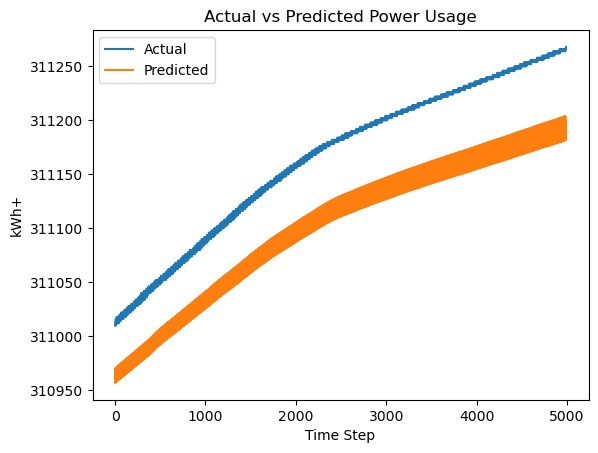

In [37]:
plt.plot(y_val_rescaled.flatten(), label='Actual')
plt.plot(predictions_rescaled.flatten(), label='Predicted')
plt.title('Actual vs Predicted Power Usage')
plt.xlabel('Time Step')
plt.ylabel('kWh+')
plt.legend()
plt.show()

In [16]:
# Calculate Mean Absolute Percentage Error (MAPE) for rescaled values 
mape = np.mean(np.abs((y_val_rescaled - predictions_rescaled.flatten()) / y_val_rescaled)) * 100

# Calculate accuracy as a percentage
accuracy = 100 - mape

# Print the evaluation metrics
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

Mean Absolute Percentage Error (MAPE): 0.03%
Accuracy: 99.97%


In [17]:
# Calculate Mean Absolute Percentage Error (MAPE) for Scaled Values
mape = np.mean(np.abs((y_val - predictions.flatten()) / y_val)) * 100

# Calculate accuracy as a percentage
accuracy = 100 - mape

# Print the evaluation metrics
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

Mean Absolute Percentage Error (MAPE): 5.93%
Accuracy: 94.07%
